In [1]:
#sumber : http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

In [2]:
#making dataset
import sklearn
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification

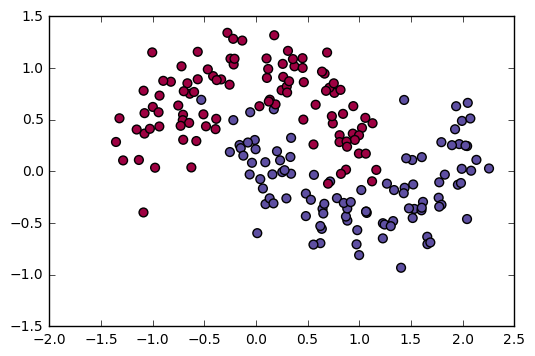

In [4]:
np.random.seed(0)
X,y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [5]:
print X[:10,:]
print y[:10]

[[ 0.74346118  0.46465633]
 [ 1.65755662 -0.63203157]
 [-0.15878875  0.25584465]
 [-1.088752   -0.39694315]
 [ 1.768052   -0.25443213]
 [ 1.95416454 -0.12850579]
 [ 0.93694537  0.36597075]
 [ 0.88446589 -0.47595401]
 [ 0.80950246  0.3505231 ]
 [ 1.2278091  -0.64785108]]
[0 1 1 0 1 1 0 1 0 1]


In [6]:
# In fact, that’s one of the major advantages of Neural Networks. You don’t need to worry about feature engineering. 
# The hidden layer of a neural network will learn features for you.

In [7]:
# Logistic Regression

# train the logistic regression classifier
from sklearn import linear_model
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [8]:
import plotly.plotly

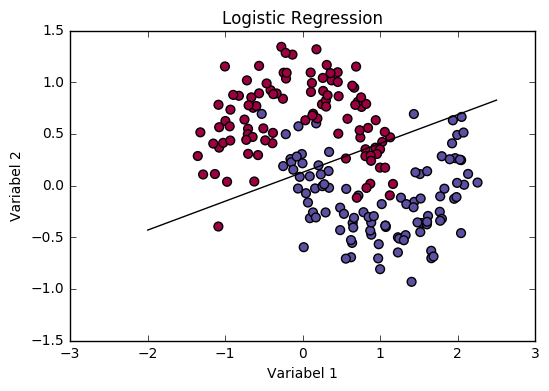

In [9]:
w = clf.coef_[0]
a = -w[0] /w[1]
xx = np.linspace(-2, 2.5)
yy = a * xx - (clf.intercept_[0])/ w[1]
plt.plot(xx, yy, 'k-')
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.title("Logistic Regression")
plt.xlabel("Variabel 1")
plt.ylabel("Variabel 2")
plt.show()

In [10]:
# Implementation Nueral Network
num_examples = len(X) #training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# gradient descent parameters
epsilon = 0.01
reg_lambda = 0.01

In [11]:
# Implement the loss function 
# helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    #calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss 

In [66]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [52]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print "Loss after iteration %i: %f" %(i, calculate_loss(model))
     
    return model

In [53]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.069001
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


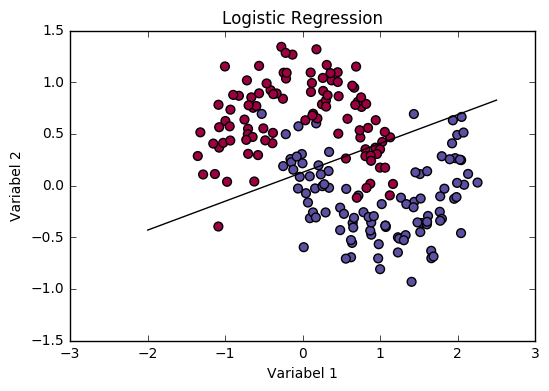

In [17]:
w = clf.coef_[0]
a = -w[0] /w[1]
xx = np.linspace(-2, 2.5)
yy = a * xx - (clf.intercept_[0])/ w[1]
plt.plot(xx, yy, 'k-')
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.title("Logistic Regression")
plt.xlabel("Variabel 1")
plt.ylabel("Variabel 2")
plt.show()

In [57]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [58]:
print xx.shape, yy.shape

(214, 281) (214, 281)


(60134,)
(214, 281)


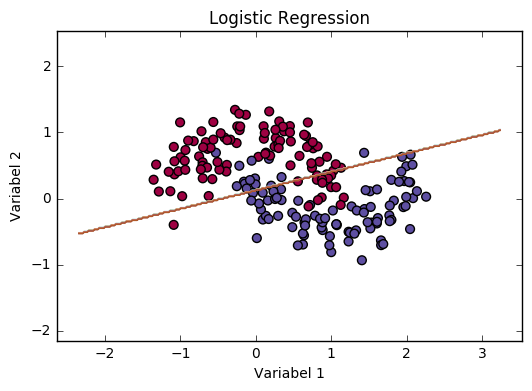

In [72]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.title("Logistic Regression")
plt.xlabel("Variabel 1")
plt.ylabel("Variabel 2")

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print Z.shape
# Put the result into a color plot
Z = Z.reshape(xx.shape)
print Z.shape
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()

In [62]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

[0 0 0 ..., 1 1 1]
(60134,)
(214, 281)


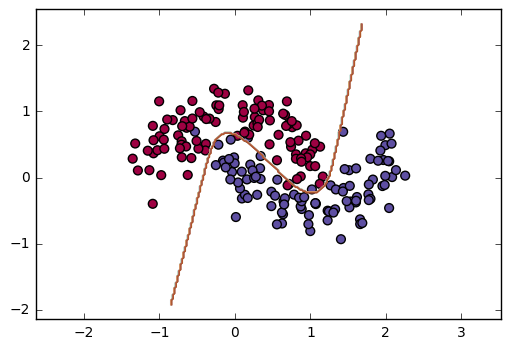

In [77]:
Z = predict(model, np.c_[xx.ravel(), yy.ravel()])
print Z
print Z.shape
Z = Z.reshape(xx.shape)
print Z.shape
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()

In [78]:
#model dengan 2 hidden layer
model2 = build_model(2, print_loss=False)
#model dengan 3 hidden layer
model3 = build_model(3, print_loss=False)
#model dengan 4 hidden layer
model4 = build_model(4, print_loss=False)


In [79]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [80]:
Z2 = predict(model2, np.c_[xx.ravel(), yy.ravel()])
Z3 = predict(model3, np.c_[xx.ravel(), yy.ravel()])
Z4 = predict(model4, np.c_[xx.ravel(), yy.ravel()])

In [81]:
Z2 = Z2.reshape(xx.shape)
Z3 = Z3.reshape(xx.shape)
Z4 = Z4.reshape(xx.shape)

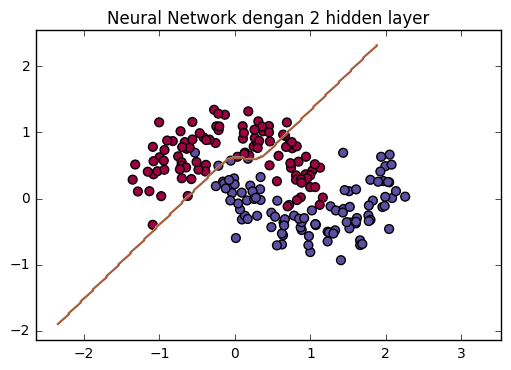

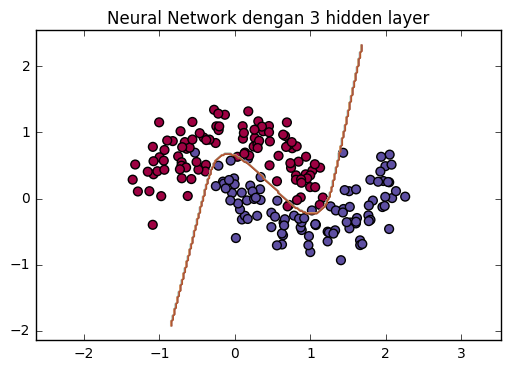

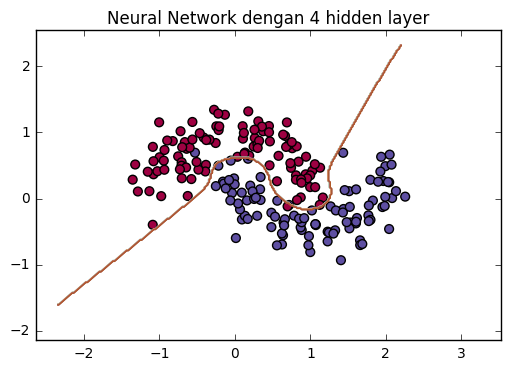

In [82]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.contour(xx, yy, Z2, cmap=plt.cm.Paired)
plt.title("Neural Network dengan 2 hidden layer")
plt.show()

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.contour(xx, yy, Z3, cmap=plt.cm.Paired)
plt.title("Neural Network dengan 3 hidden layer")
plt.show()

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.contour(xx, yy, Z4, cmap=plt.cm.Paired)
plt.title("Neural Network dengan 4 hidden layer")
plt.show()